In [17]:
""" from src.config import SRC
import pandas as pd
import numpy as np
import econtools

## DO-File 1: Preparation.. Extension Data Managment
data = pd.read_stata(SRC / "original_data" / "decisions_data.dta")
data["ind_var"] = data.groupby(["wid"])["jobschosen"].transform(np.var) #new column with variances
data.reindex(columns = data.columns.tolist() + ['ind_diff_pres','ind_diff_pred','ind_diff_pres_var','ind_diff_pred_var','ind_diff_pres_var_inv','ind_diff_pred_var_inv'])
data = econtools.group_id(data, cols=['wage_group'], name= "group", merge= True) # adds column with distinct wage groups
## Calculations of non-parametric measure for each individual.. to be continued

 """




In [13]:
# Import the two datasets and drop subjects whose individual estimates do not converge
from src.config import SRC
import pandas as pd
import numpy as np


data = pd.read_stata(SRC / "original_data" / "decisions_data.dta")    # full sample
ind_keep = pd.read_csv(SRC / "original_data" / "ind_to_keep.csv")   # import csv with ID of subjects to keep 
data = data[data.wid.isin(ind_keep.wid_col1)] # this is the primary sample for the aggregate estimates (72 individuals)

data = data[data.bonusoffered != 1]  # remove observations where a bonus was offered
data["pb"] = data["workdone1"] / 10
    # workdone1 can either be 10 or 0: dividing the variable by 10 creates the dummy
data["ind_effort10"] = (data["effort"] == 10).astype(int)  # ind_effort10 dummy
data["ind_effort110"] = (data["effort"] == 110).astype(int)  # ind_effort110 dummy
data.index = np.arange(len(data.wid))

data["netdistance"].head(5)


0    35.0
1    28.0
2     7.0
3    23.0
4    42.0
Name: netdistance, dtype: float32

                                 OLS Regression Results                                
Dep. Variable:             jobschosen   R-squared (uncentered):              240079.891
Model:                            OLS   Adj. R-squared (uncentered):         240101.880
Method:                 Least Squares   F-statistic:                              378.5
Date:                Mon, 21 Feb 2022   Prob (F-statistic):                    1.34e-35
Time:                        13:25:08   Log-Likelihood:                         -53938.
No. Observations:               10919   AIC:                                  1.079e+05
Df Residuals:                   10918   BIC:                                  1.079e+05
Df Model:                           1                                                  
Covariance Type:              cluster                                                  
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

ValueError: 0.16161186 is not in list

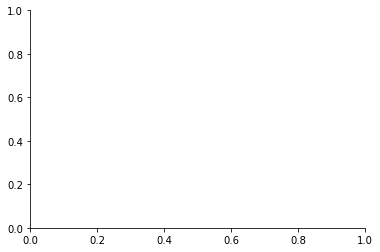

In [72]:
""" import plotly.express as px
import statsmodels.api as sm
import plotly.graph_objects as go
reg_model = sm.OLS(data["jobschosen"],data["wage"]).fit(cov_type='cluster', cov_kwds={'groups': data['wid']})
print(reg_model.summary())

fig = sm.graphics.plot_fit(reg_model, np.mean(data["wage"]))
fig.tight_layout(pad=1.0)
 """